# Do Female Fish have Pre-Existing Preferences for a Male Trait?

In [1]:
# standard library imports
import warnings

warnings.simplefilter('ignore', category=FutureWarning)

# 3rd party library imports
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm

sns.set()

In [2]:
df = pd.read_csv('case0602.csv')

# Robustness of Assumptions

In [3]:
df.groupby('Pair')['Proportion'].describe()

,count,mean,std,min,25%,50%,75%,max
Pair,,,,,,,,
Pair1,16.0,0.563750,0.088610,0.44,0.4975,0.555,0.6275,0.73
Pair2,14.0,0.609286,0.124744,0.40,0.5275,0.645,0.6975,0.80
Pair3,17.0,0.624706,0.223386,0.10,0.5100,0.620,0.8400,0.91
Pair4,14.0,0.668571,0.142443,0.42,0.5725,0.680,0.7575,0.92
Pair5,9.0,0.641111,0.092256,0.48,0.6100,0.630,0.6600,0.78
Pair6,14.0,0.633571,0.178438,0.33,0.5650,0.625,0.7900,0.88


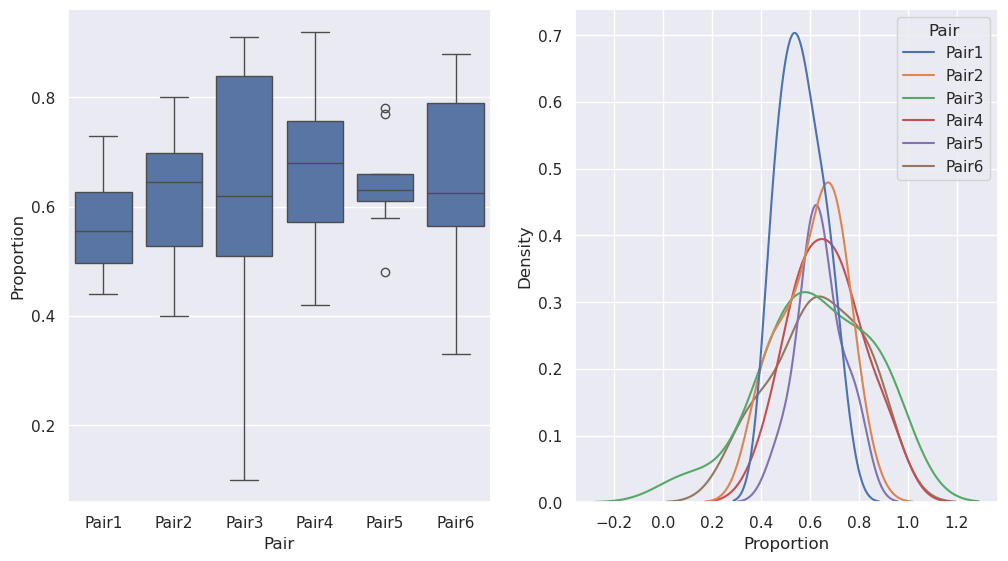

In [4]:
fig, axes = plt.subplots(ncols=2, figsize=[12, 6.4])
_ = sns.boxplot(data=df, x='Pair', y='Proportion', ax=axes[0])
_ = sns.kdeplot(data=df, x='Proportion', hue='Pair', ax=axes[1])

There is strong evidence against the assumption of equal variance.  Can we even go on with ANOVA?  Sure, let's just ignore that.

$
\begin{align}
H_0:  \mu = 0.50 \\
H_a:  \mu \ne 0.50 \\
\end{align}
$

In [5]:
res = scipy.stats.ttest_1samp(df['Proportion'], 0.50)
print(res)
print(res.confidence_interval(0.95))

TtestResult(statistic=7.227550462818526, pvalue=2.193228465685834e-10, df=83)
ConfidenceInterval(low=0.5877536118127678, high=0.6543892453300895)


There is strong evidence that the females spend a far higher proportion of their time with yellow-sword males than with transparent sword males ($t_{0.95, 83}$ = 7.2276, $p$-value < 0.0001).  We are 95% confident that females spent between 58.5% and 65.4% of their time with yellow-sword tails.

# Is there evidence of any linear trend?

In [6]:
ci = df.groupby('Pair')['Length'].mean() - df.groupby('Pair')['Length'].mean().mean()
ci

Pair
Pair1    2.5
Pair2   -1.5
Pair3    0.5
Pair4    1.5
Pair5   -4.5
Pair6    1.5
Name: Length, dtype: float64

In [7]:
model = smf.ols('Proportion ~ Pair', data=df).fit()

In [8]:
r = ci
g = ci @ df.groupby('Pair')['Proportion'].mean()
n = df.groupby('Pair')['Proportion'].count()
anova_table = sm.stats.anova_lm(model)
sp = np.sqrt(anova_table.loc['Residual', 'mean_sq'])
se = sp * np.sqrt((ci ** 2) @  (1 / n))
t = g / se
dof = n.sum() - len(n)
pvalue = scipy.stats.t.cdf(t, dof)
print(t, pvalue, dof)

-0.4527686383867447 0.32598611866890137 78


There is weak evidence of a linear trend ($t_{0.95, 78}$ = -0.4528, $p$-value = 0.3260).